# Digit recognition 

<img src="img/deepLearning.jpg" >

### 1. Description
This jupyter notebook contains information explaining Digit recognition Python script. I’ll  discuss what technologies were used in the script and step by step how it works with explanations and samples of code. Also describe in brief what is neural network, popular classification of algorithms used  to recognize handwritten numbers.The  goal of this notebook is to show how to recognize handwritten digit using a simple Multi-Layer Perceptron (MLP) in Keras and how to build a near state-of-the-art deep neural network model using Python and Keras.

### 2. What is a neural network?
A neural network is a type of machine learning which models itself after the human brain. This creates an artificial neural network that via an algorithm allows the computer to learn by incorporating new data.The computer with the neural network is taught to do a task by having it analyze training examples, which have been previously labeled in advance. A common example of a task for a neural network using deep learning is an object recognition task, where the neural network is presented with a large number of objects of a certain type, such as a cat, or a street sign, and the computer, by analyzing the recurring patterns in the presented images, learns to categorize new images.

### 2.1 How a deep learning neural network learns?
A multilayer perceptron (MLP) has one or more hidden layers along with the input and output layers, each layer contains several neurons that interconnect with each other by weight links. The number of neurons in the input layer will be the number of attributes in the dataset, neurons in the output layer will be the number of classes given in the dataset.For a basic idea of how a deep learning neural network learns, imagine a factory line. After the raw materials (the data set) are input, they are then passed down the conveyer belt, with each subsequent stop or layer extracting a different set of high-level features. If the network is intended to recognize an object, the first layer might analyze the brightness of its pixels.The next layer could then identify any edges in the image, based on lines of similar pixels. After this, another layer may recognize textures and shapes, and so on. By the time the fourth or fifth layer is reached, the deep learning net will have created complex feature detectors. 



<img src="img/neural_network.jpg">

## About Digit recognition script

### Pipeline
This is a step-by-step plan that I will follow in this notbook to create digits recognition script.<br>
<img src="img/Pipeline.png">

###  Step 1. Get the following packages and libraries
__- [Python](https://www.python.org/)__<br>
__- [NumPy](http://www.numpy.org/)__<br>
__- [Matplotlib](https://matplotlib.org/)__<br>
__- [Theano](http://deeplearning.net/software/theano/) or [TensorFlow](https://www.tensorflow.org/)__<br>
__- [Keras](https://keras.io/)__<br>

### Step 2. Imports
Organise the following imports that you will need to build neural network.

In [1]:
# Imports

# Import numpy to perform matrix/vector operations
import numpy as np
# Import matplotlib for visualization
import matplotlib.pyplot as plt
# Import Sequential model which is a linear stack of layers
from keras.models import Sequential
#Keras Imports to create the neural network model with neurons, layers and other utilities.
from keras.layers.core import Dense, Activation, Dropout
# Import MNIST datase
from keras.datasets import mnist
from keras.utils import np_utils
# Import Image for operation on image(save,open, etc)
from PIL import Image

Using TensorFlow backend.


### Step 3. Define user inputs
__- nb_epoch__ - Number of iterations needed for the network to minimize the loss function<br>
__- num_classes__ - Total number of class labels or classes involved in the classification problem.<br>
__- batch_size__ - Number of images given to the model.<br>
__- train_size__ - Number of training images to train the model.<br>
__- test_size__ - Number of testing images to test the model.<br>
__- v_length__ - Dimension of flattened input image size i.e. if input image size is 28x28, then v_length = 784.<br>

In [2]:
# Fixes a random seed for reproducibility
np.random.seed(9)

# User inputs
nb_epoch = 25 
num_classes = 10
batch_size = 128 
train_size = 60000
test_size = 10000 
v_length = 784 


### Step 4 Prepare the dataset
We are loading the MNIST dataset by calling mnist.load_data() function in Keras. Then returns two tuples that are holds train data and train label in first tuple, and test data and test label in second tuple.When data is loaded we need to analyze and pre-process the dataset that the model can understand it.
This will takes the following steps:
#### 4.1 Split the mnist data into train and test

In [3]:
# Splits the MNIST data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
# Output train data shape
print ("Train data shape: {}".format(trainData.shape))
# Output test data shape
print ("Test data shape: {}".format(testData.shape))
# Output train samples
print( "Train samples: {}".format(trainData.shape[0]))
# Output train samples test samples
print ("Test samples: {}".format(testData.shape[0]))

Train data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Train samples: 60000
Test samples: 10000


#### 4.2 Reshape the dataset
To achieve this we can use NumPy’s reshape function. In Deep Learning, we provide the raw pixel intensities of images as inputs to the neural nets. The original data and label, are images  of dimensions 28x28. If we flatten it, we will get 28x28=784 pixel intensities. 

In [4]:
# Reshapes the dataset
trainData = trainData.reshape(train_size, v_length) # Reshapes the train data
testData = testData.reshape(test_size, v_length) # Reshapes the test data

#### 4.3 Data type
This can be change using .astype function provided by NumPy.Change the pixel intensities to float32 datatype. As grayscale image pixel intensities are integers in the range 0-255, we can convert them to floating point representations.

In [5]:
trainData = trainData.astype("float32") # For train data change the pixel intensities to float32
testData = testData.astype("float32") # For test data change the pixel intensities to float32

#### 4.5 Normalize
These MNIST images of 28×28 pixels are represented as an array of numbers whose values range from 0-255 of type uint8. But it is usual to scale the input values of neural networks to certain ranges.I have normalize these floating point values in the range (0-1) to improve computational efficiency as well as to follow the standards.

In [6]:
trainData /= 255 # grayscale image pixel intensities are integers in the range [0-255]
testData /= 255

#### 4.6 Output reshaped train  and test data 
We can verify that trainData.shape takes the form of (60000, 784) and testData.shape takes the form of (10000, 784), where the first dimension indexes the image and the second indexes the pixel in each image (now the intensity of the pixel is a value between 0 and 1).

In [7]:
#Output reshaped train data 
print ("Train data shape: {}".format(trainData.shape))
# Output reshaped test data  
print ("Test data shape: {}".format(testData.shape))
# Output reshaped train samples  
print ("Train samples: {}".format(trainData.shape[0]))
# Output reshaped test samples
print ("Test samples: {}".format(testData.shape[0]))

Train data shape: (60000, 784)
Test data shape: (10000, 784)
Train samples: 60000
Test samples: 10000


### Step 5 One Hot Encoding
A one hot encoding is a representation of categorical variables as binary vectors.This first requires that the categorical values be mapped to integer values. The Keras library offers a function np_utils.to_categorical function, which takes in labels and number of class labels as input.

In [8]:
# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)

### Step 6 Create the model
The main data structure in Keras is the Sequential class, which allows the creation of a basic neural network. Keras also offers an API that allows implementing more complex models in the form of a graph that can have multiple inputs, multiple outputs. In Keras we can find all the required types of layers that can be added to the model through the add() method. Find out more about creating the mode with [Keras](https://keras.io/models/model/).

In [9]:
# Creates the model
model = Sequential()

Multi-Layer Perceptron (MLP) will be use as neural network model with 784 input neurons. Also we will use two hidden layers. First one contains 512 neurons and second layer contains 256 neurons, followed by a fully connected layer of 10 neurons for taking the probabilities of all the class labels.[ReLU](https://keras.io/activations/) is used as the activation function for hidden layers and [softmax](https://keras.io/activations/) is used as the activation function for output layer. Add the and we can sumerized the model and output the results.

In [10]:
# Two hidden layers are used with 512 neurons in hidden layer 1 a
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu")) # Activation function for hidden layers
model.add(Dropout(0.2)) # 20% is used as is a weight constraint on those layers
model.add(Dense(256)) #  256 neurons in hidden layer 2
model.add(Activation("relu"))  # Activation function for hidden layers
model.add(Dropout(0.2))# 20% is used as is a weight constraint on those layers
model.add(Dense(num_classes))
model.add(Activation("softmax")) #  Activation function for output layer.

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

### Step 7 Compile the model
Next step is to indicate the metric that we will use to monitor the learning process (and test) of neural network. __categorical_crossentropy__ as the loss function (as this is a multi-label classification problem), __adam__ (gradient descent algorithm) as the optimizer and __accuracy__ as our performance metric. More information about compiling the model you can find under this [link](https://keras.io/models/model/).

In [11]:
# Compiles the model
# categorical_crossentropy as the loss function, adam as the optimizer and accuracy as our performance metric.
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

### Step 8 Fit the model
To fit our model we can use a function called __model.fit__. This function requires some arguments such as : trainData,mTrainLabels,validation_data,batch_size,nb_epoch that we created before. Verbose argument is for debugging purposes.
I used __history__ object to analyse how our model gets trained with the dataset which is also provided by Keras.

In [12]:
# Remove Warnings
import warnings
warnings.simplefilter("ignore")
# fit the model
history = model.fit(trainData, mTrainLabels,validation_data=(testData, mTestLabels),batch_size=batch_size,nb_epoch=nb_epoch,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 8s - loss: 0.2648 - acc: 0.9210 - val_loss: 0.1091 - val_acc: 0.9666
Epoch 2/25
 - 8s - loss: 0.1070 - acc: 0.9670 - val_loss: 0.0842 - val_acc: 0.9726
Epoch 3/25
 - 9s - loss: 0.0766 - acc: 0.9762 - val_loss: 0.0677 - val_acc: 0.9783
Epoch 4/25
 - 9s - loss: 0.0579 - acc: 0.9816 - val_loss: 0.0663 - val_acc: 0.9792
Epoch 5/25
 - 9s - loss: 0.0491 - acc: 0.9841 - val_loss: 0.0635 - val_acc: 0.9799
Epoch 6/25
 - 9s - loss: 0.0401 - acc: 0.9875 - val_loss: 0.0599 - val_acc: 0.9823
Epoch 7/25
 - 9s - loss: 0.0357 - acc: 0.9880 - val_loss: 0.0646 - val_acc: 0.9809
Epoch 8/25
 - 8s - loss: 0.0313 - acc: 0.9895 - val_loss: 0.0742 - val_acc: 0.9774
Epoch 9/25
 - 9s - loss: 0.0274 - acc: 0.9908 - val_loss: 0.0643 - val_acc: 0.9843
Epoch 10/25
 - 9s - loss: 0.0253 - acc: 0.9914 - val_loss: 0.0638 - val_acc: 0.9822
Epoch 11/25
 - 8s - loss: 0.0237 - acc: 0.9914 - val_loss: 0.0725 - val_acc: 0.9809
Epoch 12/25
 - 8s - loss: 0.0222 - 

### Step 9 Evaluate the model
To evaluate our model we can use function that is provided by Keras which is called __model.evaluate__. Thanks to this we can give a prediction to test data and test labels.

In [13]:
# List all data in history
print (history.history.keys())

# Evaluate the model and makes prediction
scores = model.evaluate(testData, mTestLabels, verbose=0)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


### Step 10 Visualize 
Using matplotlib we are able to visualize how our model reacts at different epochs on both training and testing data.

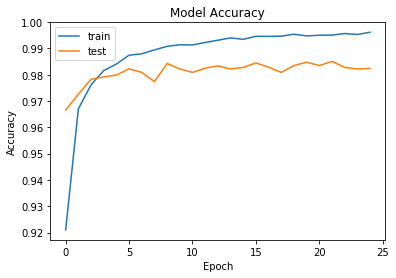

In [14]:
# Using matplotlib we can visualize how our model reacts at different epochs on both training and testing data.
# History plot for accuracy
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
# Shows plots
plt.show()

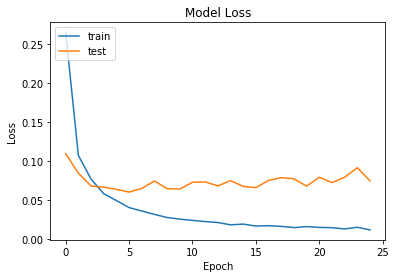

Test score - 0.07433366189347171
Test accuracy - 0.9824


In [15]:
# History plot for accuracy
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
# Shows plots
plt.show()

# Print the results
print ("Test score - {}".format(scores[0]))
print ("Test accuracy - {}".format(scores[1]))

As you can see using MLP model with just two hidden layers we got very good test accuracy resul which was 0.98%. 

### Step 11 Testing the model
Now we are able to test our model using images from MNIST test data. As we know we have 10000 images available for testing. Let's check them using __model.predict_classes__ function which takes in the flattened raw pixel intensities of the test image.

Test images shape - (4, 28, 28)
My prediction for image is - 1
My prediction for image is - 4
My prediction for image is - 9
My prediction for image is - 6


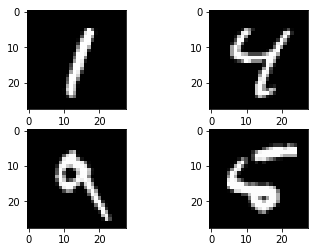

In [16]:
# Takes some test images from the test data
test_imgs= testData[5:9]

# Reshape the test images to standard 28x28 format
test_imgs = test_imgs.reshape(test_imgs.shape[0], 28, 28)
# Output prediction for image
print( "Test images shape - {}".format(test_imgs.shape))

# Loop over each of the test images
for i, test_img in enumerate(test_imgs, start=1):
    # Takes a copy of test image for viewing
    org_image = test_img
    # For model to understand, have to reshape the test image to 1x784 format 
    test_img = test_img.reshape(1,784)
    # Make prediction on test image using our trained model
    prediction = model.predict_classes(test_img, verbose=0)
    # Output the prediction and image
    print ("My prediction for image is - {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))

# Shows plots
plt.show()

### References:

https://www.techradar.com/news/what-is-a-neural-network

https://www.analyticsvidhya.com/blog/2016/08/evolution-core-concepts-deep-learning-neural-networks/

https://www.digitaltrends.com/cool-tech/what-is-an-artificial-neural-network/

https://gogul09.github.io/software/digits-recognition-mlp

https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

https://keras.io/models/model/

https://towardsdatascience.com/deep-learning-for-beginners-practical-guide-with-python-and-keras-d295bfca4487